In [4]:
import pandas
titanic = pandas.read_csv("https://databootcamp.nyc3.digitaloceanspaces.com/titanic_1_aula.csv")

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Vamos focar a nossa análise para detectar padrões que vão nos dizer quem sobreviveu ou não!

Pra isso, primeiro vamos ver os dados brutos sobre esse dado.

### Qual a taxa de sobrevivência?

In [6]:
filtro_mortos = titanic["Survived"] == 0
filtro_vivos = titanic["Survived"] == 1

Vamos aplicar o filtro no nosso dataframe e ver como ele fica. 

Olhem a coluna do índice como não estamos trazendo mais todas as linhas.

In [7]:
titanic[filtro_mortos].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4


In [8]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
titanic[filtro_mortos]['Survived'].value_counts()

0    549
Name: Survived, dtype: int64

Agora podemos contar quantas linhas foram retornadas

In [10]:
titanic[filtro_mortos].count()
# o count só conta dados não nulos

PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            424
SibSp          549
Parch          549
Ticket         549
Fare           549
Cabin           68
Embarked       549
relatives      549
dtype: int64

Ele retorna a contagem de linhas **não nulas** para cada coluna, muitas vezes nós precisamos apenas do valor, para isso podemos selecionar uma coluna que contenha todos os registros.

In [11]:
titanic[filtro_mortos]["PassengerId"].count()

549

Agora que sabemos contar os valores após um filtro podemos aplicar para quem sobreviveu

In [12]:
titanic[filtro_vivos]["PassengerId"].count()

342

Quando temos apenas uma feature (coluna) nós conseguimos ter o mesmo resultado usando o `value_counts` do Pandas, ele conta a presença de cada valor

In [13]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Com esse dado agrupado pelo `value_counts` podemos usar o `plot`

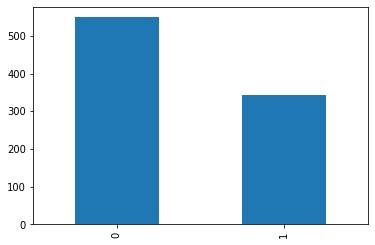

In [14]:
titanic["Survived"].value_counts().plot.bar()

**Com as contagens sabemos que mais pessoas morreram, mas quantos porcentos isso significa?**

Vamos criar uma função que calcula isso para gente, ela espera um valor e o total de elementos.

In [15]:
def calculate_percentage(val, total):
    """Calculates the percentage of a value over a total"""

    percent = float(val / total)*100 #calcula a porcentagem
    round_two_points = round(percent, 2) #coloca em duas casa decimais
    add_percentage_symbol = str(round_two_points) + "%" #para exibição converte em string e adiciona o %

    return add_percentage_symbol

Vamos pegar os contadores que precisamos para usar na função

In [16]:
total = titanic["PassengerId"].count()

nao_sobreviveu_count = titanic[filtro_mortos]["PassengerId"].count()
sobreviveu_count = titanic[filtro_vivos]["PassengerId"].count()

In [17]:
print(calculate_percentage(sobreviveu_count, total))

38.38%


In [18]:
print(calculate_percentage(nao_sobreviveu_count, total))

61.62%


### Existe alguma correlação entre o fato de ter parentes e sobreviver?

#### Primeiro qual a porcentagem geral de pessoas com parentes a bordo?

In [19]:
filtro_sozinho = titanic["relatives"] == 0
filtro_familia = titanic["relatives"] > 0

sem_familia_count = titanic[filtro_sozinho]["PassengerId"].count()
com_familia_count = titanic[filtro_familia]["PassengerId"].count()

print(calculate_percentage(sem_familia_count, total))
print(calculate_percentage(com_familia_count, total))

60.27%
39.73%


Vamos começar pelos que não sobreviveram

In [20]:
titanic[filtro_mortos & filtro_familia].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,4
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,6
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,5
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S,1


In [21]:
mortos_e_sozinhos = titanic[filtro_mortos & filtro_sozinho]

mortos_e_sozinhos_count = mortos_e_sozinhos["PassengerId"].count()
mortos_e_sozinhos_count

374

In [22]:
mortos_e_com_familia = titanic[filtro_mortos & filtro_familia]

mortos_e_com_familia_count = mortos_e_com_familia["PassengerId"].count()
mortos_e_com_familia_count

175

In [23]:
print("Não sobreviveu que NÃO tem família no Barco", calculate_percentage(mortos_e_sozinhos_count, nao_sobreviveu_count))
print("Não sobreviveu que TEM família no Barco",calculate_percentage(mortos_e_com_familia_count, nao_sobreviveu_count))

Não sobreviveu que NÃO tem família no Barco 68.12%
Não sobreviveu que TEM família no Barco 31.88%


Maioria dos mortos não tinha familia no barco!

Vamos ver os vivos para ver se essa informação é relevante!

In [24]:
vivos_e_sozinhos = titanic[filtro_vivos & filtro_sozinho]

vivos_e_sozinhos_count = vivos_e_sozinhos["PassengerId"].count()
vivos_e_sozinhos_count

163

In [25]:
vivos_e_com_familia = titanic[filtro_vivos & filtro_familia]

vivos_e_com_familia_count = vivos_e_com_familia["PassengerId"].count()
vivos_e_com_familia_count

179

In [26]:
print("Sobrevivente que NÃO tem família no Barco", calculate_percentage(vivos_e_sozinhos_count, sobreviveu_count))
print("Sobrevivente que TEM família no Barco",calculate_percentage(vivos_e_com_familia_count, sobreviveu_count))

Sobrevivente que NÃO tem família no Barco 47.66%
Sobrevivente que TEM família no Barco 52.34%


#### Não começaria acreditando que isso contém uma forte relação para definir sobrevivência mas sobre os mortos teve um belo impacto!

### **Desafio:** Quais features `colunas` você investigaria que são importantes para sobrevivência? 
### Faça uma análise de pelo menos duas delas.

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)


In [27]:
#solução
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
filtro_sex_f = titanic["Sex"] == 'female'
filtro_sex_m = titanic["Sex"] == 'male'

filtro_sobreviveu = titanic['Survived'] == 1
filtro_nao_sobreviveu = titanic['Survived'] == 0

filtro_primeira_classe = titanic['Pclass'] == 1
filtro_segunda_classe = titanic['Pclass'] == 2
filtro_terceira_classe = titanic['Pclass'] == 3

mulheres_nao_sobreviventes = titanic[filtro_sex_f & filtro_nao_sobreviveu]['Survived']
print('mulheres não sobreviventes:', mulheres_nao_sobreviventes.count())
mulheres_sobreviventes = titanic[filtro_sex_f & filtro_sobreviveu]['Survived']
print('mulheres sobreviventes:', mulheres_sobreviventes.count())

mulheres_sobreviventes_primeira_classe = titanic[mulheres_sobreviventes & filtro_primeira_classe]['Survived']
print('mulheres sobreviventes da primeira classe:', mulheres_sobreviventes_primeira_classe.count())
mulheres_sobreviventes_segunda_classe = titanic[mulheres_sobreviventes & filtro_segunda_classe]['Survived']
print('mulheres sobreviventes da segunda classe:', mulheres_sobreviventes_segunda_classe.count())
mulheres_sobreviventes_terceira_classe = titanic[mulheres_sobreviventes & filtro_terceira_classe]['Survived']
print('mulheres sobreviventes da terceira classe:', mulheres_sobreviventes_terceira_classe.count())


# outra forma
print(titanic[filtro_mortos & filtro_sex_f]['Pclass'].value_counts())
print(titanic[filtro_vivos & filtro_sex_f]['Pclass'].value_counts())

# vira um data frame
titanic[filtro_vivos & filtro_sex_f]['Pclass'].value_counts().reset_index()


mulheres não sobreviventes: 81
mulheres sobreviventes: 233
mulheres sobreviventes da primeira classe: 91
mulheres sobreviventes da segunda classe: 70
mulheres sobreviventes da terceira classe: 72
3    72
2     6
1     3
Name: Pclass, dtype: int64
1    91
3    72
2    70
Name: Pclass, dtype: int64


,index,Pclass
0,1,91
1,3,72
2,2,70


**Alguns dados são mais difíceis de usar essa análise pois eles não do tipo numérico contínuo.**

### Será que existe alguma correlação entre a idade e o sobreviver?

Um problema é que a idade é um dado contínuo e não categórico como esses que estávamos trabalhando. Podemos criar grupos de idade (faixa etária) para analisarmos.

### O que são dados categóricos?
Categóricos são um tipo de dados que correspondem a variáveis ​​categóricas nas estatísticas. **Uma variável categórica assume um número limitado e geralmente fixo de valores possíveis**. Exemplos são sexo, classe social, tipo sanguíneo, afiliação a país, tempo de observaçãom etc.

![alt text](https://2.bp.blogspot.com/-IUepWeQ3HDA/VO2LddsPkDI/AAAAAAAACNU/pyoF8xyaYsg/s1600/datatypes.png)

**Transformando dados numéricos em dados categóricos**

Para transformar os dados das idades em categóricos nós vamos usar o `cut`, ele funciona criando intervalos de dados para ajudar nas análises. Vamos ver como ele funciona.

1- Vamos criar os intervalos que vamos usar.

In [29]:
[titanic.Age.min()-1, 10, 18, 65, titanic.Age.max()]

[-0.5800000000000001, 10, 18, 65, 80.0]

2- Vamos dar rótulos/nomes para cada intervalor, esses rótulos são para os intervalos e não para o valor.

In [30]:
["criança", "adolescente", "adulto", "idoso"]

['criança', 'adolescente', 'adulto', 'idoso']

3- Nós iremos usar a função `cut`, ela espera 3 variáveis: `coluna`, `intervalos`, `rótulos`.

In [31]:
intervalos = [titanic.Age.min()-1, 10, 18, 65, titanic.Age.max()]
rotulos = ["criança","adolescente","adulto","idoso"]

serie_faixa_etaria = pandas.cut(titanic["Age"], intervalos, labels=rotulos)
serie_faixa_etaria.head(10)

0         adulto
1         adulto
2         adulto
3         adulto
4         adulto
5            NaN
6         adulto
7        criança
8         adulto
9    adolescente
Name: Age, dtype: category
Categories (4, object): [criança < adolescente < adulto < idoso]

O range são os valores que delimitam os intervalos.
Nesse caso as regras são
- criança:<br>
    $idade_{minima}-1 < idade \leqslant 10$
    
    
- adolescente:<br>
    $10 < idade \leqslant 18$
    
    
- adulto:<br>
    $18 < idade \leqslant 65$
    
    
- idoso:<br>
    $65 < idade \leqslant idade_{maxima}$

Vamos criar uma coluna com os valores de faixa etária que criamos.

In [32]:
titanic["faixa_etaria"] = serie_faixa_etaria

Vamos ver o `tipo` do dado da coluna `faixa_etaria`

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           714 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  relatives     891 non-null    int64   
 13  faixa_etaria  714 non-null    category
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.7+ KB


Quando nós temos uma coluna do tipo categórico, nós podemos acessar funções que somente ela tem. Um exemplo é o `describe` que agora retorna a frequência que cada valor aparece.

In [34]:
pandas.Categorical(titanic["faixa_etaria"]).describe()

,counts,freqs
categories,,
criança,64,0.071829
adolescente,75,0.084175
adulto,567,0.636364
idoso,8,0.008979
NaN,177,0.198653


**Agora que temos `faixa_etarias` podemos medir o impacto da idade na taxa de sobrevivência**

Primeiro vamos criar um filtro para cada faixa etária

In [35]:
filtro_crianca = titanic["faixa_etaria"] == "criança"
filtro_adolescente = titanic["faixa_etaria"] == "adolescente"
filtro_adulto = titanic["faixa_etaria"] == "adulto"
filtro_idoso = titanic["faixa_etaria"] == "idoso"

In [36]:
titanic[filtro_mortos & filtro_crianca]["PassengerId"].count()

26

In [37]:
titanic[filtro_vivos & filtro_crianca]["PassengerId"].count()

38

In [38]:
titanic[filtro_mortos & filtro_adolescente]["PassengerId"].count()

43

In [39]:
titanic[filtro_vivos & filtro_adolescente]["PassengerId"].count()

32

In [40]:
titanic[filtro_mortos & filtro_adulto]["PassengerId"].count()

348

In [41]:
titanic[filtro_vivos & filtro_adulto]["PassengerId"].count()

219

In [42]:
titanic[filtro_mortos & filtro_idoso]["PassengerId"].count()

7

In [43]:
titanic[filtro_vivos & filtro_idoso]["PassengerId"].count()

1

**Olhando esses dados o único grupo que teve mais sobreviventes que mortos foi o grupo das crianças.**

**Dica: Uma outra forma de tratar os intervalos é criando intervalos fixos.**

In [44]:
# para cada coluna ele cria um intervalo de idade (ele quebra em 5 idades)
# ele pegou a útima idade (80) e dividiu em 5 categorias
pandas.cut(titanic["Age"], bins = 5).head(20)

0     (16.336, 32.252]
1     (32.252, 48.168]
2     (16.336, 32.252]
3     (32.252, 48.168]
4     (32.252, 48.168]
5                  NaN
6     (48.168, 64.084]
7       (0.34, 16.336]
8     (16.336, 32.252]
9       (0.34, 16.336]
10      (0.34, 16.336]
11    (48.168, 64.084]
12    (16.336, 32.252]
13    (32.252, 48.168]
14      (0.34, 16.336]
15    (48.168, 64.084]
16      (0.34, 16.336]
17                 NaN
18    (16.336, 32.252]
19                 NaN
Name: Age, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

Veja os intervalos criados `(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]`

Vamos ver como o `describe` ficou:

In [45]:
age_auto_cut = pandas.cut(titanic["Age"], bins=5)

age_auto_cut_cat = pandas.Categorical(age_auto_cut)
age_auto_cut_cat.describe()

,counts,freqs
categories,,
"(0.34, 16.336]",100,0.112233
"(16.336, 32.252]",346,0.388328
"(32.252, 48.168]",188,0.210999
"(48.168, 64.084]",69,0.077441
"(64.084, 80.0]",11,0.012346
NaN,177,0.198653


### **Desafio:** Faça o `cut` para o `Fare` e vejamos se o preço do ticket ajudou a sobreviver.

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [46]:
# resolução
# preciso fazer
# não peguei a solução no final

fare_qcut = pandas.qcut(titanic['Fare'], q=5, labels=[1, 2, 3, 4, 5])

fare_qcut_cat = pandas.Categorical(fare_qcut)
fare_qcut_cat.describe()

titanic['fare_qcut'] = fare_qcut_cat
titanic.head()

filtro1 = titanic['fare_qcut'] == 1
filtro2 = titanic['fare_qcut'] == 2
filtro3 = titanic['fare_qcut'] == 3
filtro4 = titanic['fare_qcut'] == 4
filtro5 = titanic['fare_qcut'] == 5




## Birkenhead Drill

![](https://listverse.com/wp-content/uploads/2017/04/women-and-children-first.jpg)

Em 1852, existia um código de conduta chamado ***Birkenhead Drill***, que protocolava a ordem de resgate de uma situação de vida e morte. Esse código ***priorizava a vida das mulheres e crianças***. Sabemos que o acidente do Titanic ocorreu em 1912, décadas depois da criação deste código. 

### **Desafio:** Crie um filtro que reproduza o código de conduta e verifique se ele foi aplicado.
```
Mulheres e Crianças são priorizadas nesse código de conduta.
```

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)


In [73]:
#solucao
crianca_ou_mulheres = titanic[(filtro_crianca | filtro_sex_m) & filtro_sobreviveu]
crianca_ou_mulheres


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,faixa_etaria,fare_qcut
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,criança,3
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,NaN,3
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,adulto,3
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,adulto,4
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,0,adulto,5
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,0,NaN,4
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0,adulto,4
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,2,criança,3


In [88]:
mortos_bd  = titanic[filtro_mortos & (filtro_crianca | filtro_sex_f)]
mortos_count_bd = mortos_bd['PassengerId'].count()
mortos_count_bd

95

In [89]:
vivos_bd = titanic[filtro_vivos & (filtro_sex_f | filtro_crianca)]
vivos_count_bd = vivos_bd['PassengerId'].count()
vivos_count_bd

252

In [90]:
calculate_percentage(vivos_count_bd, sobreviveu_count)

'73.68%'

### Gráfico de dispersão (scatter plot)

São utilizados para pontuar dados em um eixo vertical e horizontal com a intenção de exibir quanto uma variável é afetada por outra.
O gráfico de dispersão utiliza coordenadas cartesianas para exibir valores de um conjunto de dados, para permitir uma visualização melhor usamos o [colormap](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html).

**Qual a relação entre idade e valor pago e a taxa de sobrevivência?**

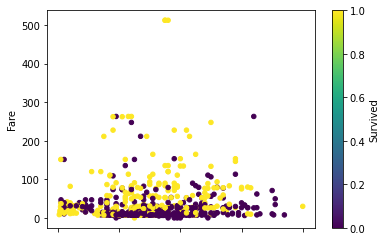

In [91]:
# pessoas marcadas como amarela sobreviveram
# tarifas altas sobreviveram mais
# crinaças mesmo nas tarifas baixas sobreviveram mais
titanic.plot.scatter(x="Age", y="Fare", c="Survived", colormap='viridis')

**Qual a relação entre idade e valor pago e a classe?**

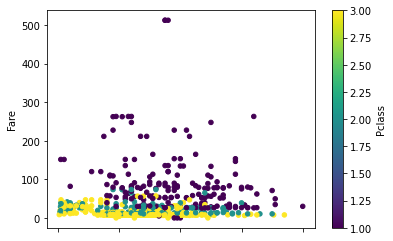

In [93]:
titanic.plot.scatter(x="Age", y="Fare", c="Pclass", colormap='viridis')

**Como sabemos se essa relação impactou na taxa de sobrevivência?**

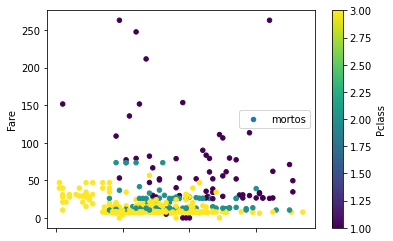

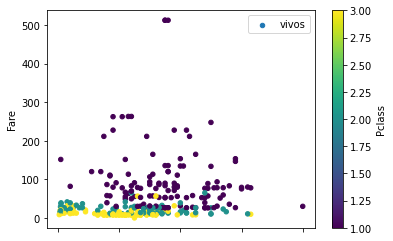

In [94]:
titanic[filtro_mortos].plot.scatter(x="Age", y="Fare", c="Pclass", colormap='viridis', label="mortos")
titanic[filtro_vivos].plot.scatter(x="Age", y="Fare", c="Pclass", colormap='viridis', label="vivos")

## 2 - Apagando colunas de um jeito seguro

Isso é muito útil quando temos um dataset grande ou quando aquele dado foi substituído por outro melhor. Somente para exemplos vamos ver como podemos apagar a coluna `Age`.

In [95]:
titanic.drop(["Age"], axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,faixa_etaria,fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,1,adulto,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,1,adulto,5
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,1,adulto,5
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,0,adulto,2


In [96]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,faixa_etaria,fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,adulto,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,adulto,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,adulto,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,adulto,2


## 3 - Renomeando as colunas

Quando criamos as colunas `relatives` e `faixa_etaria` acabamos não seguindo o padrão dos nomes das colunas já existentes, isso é ruim para quem for usar o nosso dataset no futuro.

In [98]:
titanic_renamed = titanic.rename(columns={"relatives": "Relatives", "faixa_etaria": "AgeRange"})

In [99]:
titanic_renamed.to_csv("titanic_2_part.csv", index=False)